In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import glob
from astropy.cosmology import LambdaCDM
from astropy.cosmology import z_at_value
import astropy.units as u
import astropy.cosmology.units as cu
import pickle
from tqdm import tqdm
from halotools.mock_observables import return_xyz_formatted_array
from halotools.mock_observables import FoFGroups
from time import time
from astropy.coordinates import Distance

h = 0.72

In [2]:
#~1min
ids = np.array([])
masses = np.array([])
xs = np.array([])
ys = np.array([])
zs = np.array([])
vxs = np.array([])
vys = np.array([])
vzs = np.array([])

for i in list(range(46,76)): #data for z<0.5
    print(i)
    with h5py.File('/Users/laelshin/Desktop/SNU/course_work/2024_1/big_data/term_project/HR4_LC_0p6/LC.00'+str(i)+'.hdf5', 'r') as f:
        ids = np.append(ids,np.array(f['ID']))
        #print(len(ids))
        masses = np.append(masses,np.array(f['mass']))
        xs = np.append(xs,np.array(f['x']))
        ys = np.append(ys,np.array(f['y']))
        zs = np.append(zs,np.array(f['z']))
        vxs = np.append(vxs,np.array(f['vx']))
        vys = np.append(vys,np.array(f['vy']))
        vzs = np.append(vzs,np.array(f['vz']))
    

46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75


In [3]:
print(len(xs))

180911250


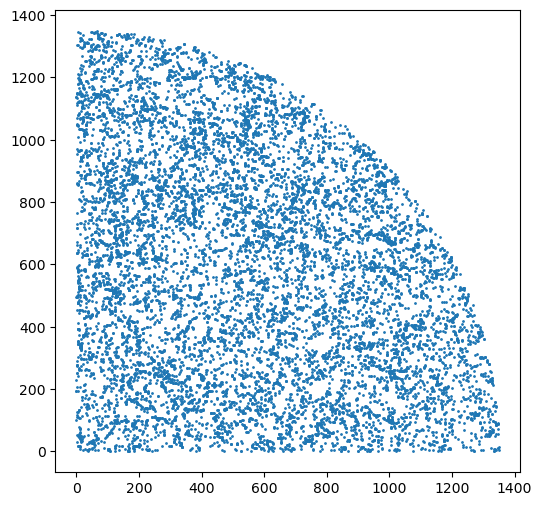

In [4]:
plt.subplots(1,1,figsize = (6,6))
plt.scatter(xs[(xs>0) & (ys>0) & (zs>-0.5) & (zs<0.5)],ys[(xs>0) & (ys>0) & (zs>-0.5) & (zs<0.5)],s = 1)
#plt.xlim(0,10)
#plt.ylim(0,10)


In [5]:
#~10s
rbins = np.linspace(0,1500,16)
gal_num = []
for i in range(15):
    #print(i)
    gal_num.append(len(xs[(xs**2 + ys**2 + zs**2 > rbins[i]**2) & (xs**2 + ys**2 + zs**2 < rbins[i+1]**2)]))

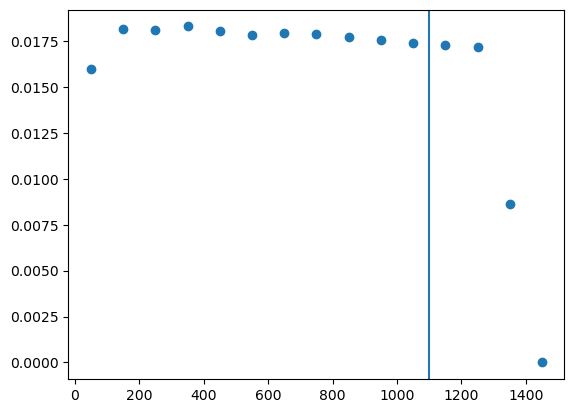

In [6]:
plt.scatter(rbins[:-1]+50, [gal_num[i]/(4*np.pi/3)/(rbins[i+1]**3-rbins[i]**3) for i in range(15)])
plt.axvline(x=1526*h) #z=0.4 -> 1526Mpc comoving distance

# mean distance

In [18]:
dist_cut = 1526*h
ids_cl = ids[xs**2 + ys**2 +zs**2 < dist_cut**2]  
masses_cl = masses[xs**2 + ys**2 +zs**2 < dist_cut**2]  
xs_cl = xs[xs**2 + ys**2 +zs**2 < dist_cut**2]  
ys_cl = ys[xs**2 + ys**2 +zs**2 < dist_cut**2]   
zs_cl = zs[xs**2 + ys**2 +zs**2 < dist_cut**2]   
vxs_cl = vxs[xs**2 + ys**2 +zs**2 < dist_cut**2]  
vys_cl = vys[xs**2 + ys**2 +zs**2 < dist_cut**2]  
vzs_cl = vzs[xs**2 + ys**2 +zs**2 < dist_cut**2]  

del(ids);del(masses);del(xs );del(ys );del(zs );del(vxs);del(vys);del(vzs)


In [19]:
#d_mean = n_mean**(-1/3)
dist_avg = (4*np.pi/3*dist_cut**3 / len(ids_cl))**(1/3)
print(dist_avg)
print(0.2*dist_avg)


3.8371801806386796
0.7674360361277359


In [22]:
#~few seconds
#spherical coord
r_cl = np.sqrt(xs_cl**2 + ys_cl**2 + zs_cl**2)
v_rv_cl = (xs_cl*vxs_cl + ys_cl*vys_cl + zs_cl*vzs_cl)/r_cl
theta_cl = np.arccos(zs_cl/r_cl) #zero to pi
pi_cl = ys_cl/np.abs(ys_cl)*np.arccos(xs_cl/np.sqrt(xs_cl**2 + ys_cl**2)) #-pi to pi
#https://halotools.readthedocs.io/en/latest/api/halotools.mock_observables.return_xyz_formatted_array.html#halotools.mock_observables.return_xyz_formatted_array
#https://github.com/astropy/astropy/issues/14823
#(1+z_obs) = (1+z_comoving)(1+z_peculiar)??

In [ ]:
np.array(z_at_value(cos.comoving_distance, 1526*u.Mpc, method = 'Bounded'))

In [ ]:
redshift = z_at_value(WMAP9.comoving_distance, r_cl_mpc, method='Bounded')

redshift

In [24]:
from astropy.cosmology import LambdaCDM
from astropy.cosmology import z_at_value
import astropy.units as u
import astropy.cosmology.units as cu

t_start = time()

cos = LambdaCDM(H0=72, Om0=0.26, Ode0=0.74)
r_cl_mpc = r_cl*u.Mpc
z_c = z_at_value(cos.comoving_distance, r_cl_mpc[:10000], method = 'Bounded').value
#z_c = np.array(r_cl_mpc.to(cu.redshift, cu.redshift_distance(cos, kind="comoving")))

t_end = time()

print("Calculation is done. Time: ",t_end-t_start)

Calculation is done. Time:  8.406469821929932


In [80]:
z_c

array([0.28006571, 0.28005517, 0.27998247, ..., 0.27973358, 0.27997054,
       0.27984359])

# FoF

157839


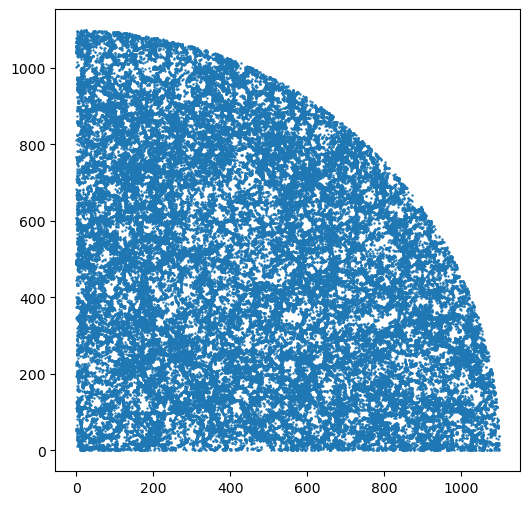

In [25]:
#piecewise
x_p = xs_cl[(xs_cl>0) & (ys_cl>0) & (zs_cl>-5) & (zs_cl<5)]
y_p = ys_cl[(xs_cl>0) & (ys_cl>0) & (zs_cl>-5) & (zs_cl<5)]
z_p = zs_cl[(xs_cl>0) & (ys_cl>0) & (zs_cl>-5) & (zs_cl<5)]

plt.subplots(1,1,figsize = (6,6))
plt.scatter(x_p,y_p,s = 0.5)
print(len(x_p))

In [27]:
#pos = return_xyz_formatted_array(xs_cl, ys_cl, zs_cl)
pos = return_xyz_formatted_array(x_p, y_p, z_p)

In [28]:
#Setting a large box size and correct the linking length to avoid the effect of periodic boundary
#linking length = b_tool*d_mean_tool = b_tool*(L_box^3 / N)**(1/3) = b_real*(4*np.pi/3*dist_cut**3 / N)**(1/3)
#b_tool = b_real * ( 4*np.pi/3*dist_cut**3 / L_box**3 )**(1/3) 

t_start = time() 

b_real = 0.2
L_box = 1e4
#b_tool = b_real * ( 4*np.pi/3*dist_cut**3 / L_box**3 )**(1/3) 
b_tool = b_real * ( np.pi*(dist_cut**2)/4*10 / L_box**3 )**(1/3) # is it right? NEED TO BE CHECKED!
print(b_tool*(L_box**3 / len(pos))**(1/3))
print(b_tool)
groups = FoFGroups(pos, b_tool, b_tool, Lbox = L_box, num_threads='max')
t_end = time()

print("Calculation is done. Time: ",t_end-t_start)

0.7832730833621822
0.004233029640370502
Calculation is done. Time:  12.550739765167236


In [98]:
Nfof = groups.n_groups
labels= groups.group_ids

cng = []
for i in range(Nfof):
    cng.append(len(labels[np.where(labels == i)[0]]))

cng = np.array(cng)
labels = np.array(labels)


data = [Nfof, cng, labels]  

#algorithm_stellar mass cut_Rcut.npy
#with open("fof_10^8_2425", "wb") as fp:
#    pickle.dump(data, fp)
    
#with open("fof_10^8_2425", "rb") as fp:   # Unpickling
#    b = pickle.load(fp)

#b[0]

In [100]:
print(len(cng[cng>10]))
#plt.hist(cng)
#plt.xscale('log')


1269


In [106]:
len(labels)

157839

In [129]:
id_fof[cng == max(cng)]

array([84035])

In [110]:
id_fof = np.array(range(Nfof))
id_fof_good = id_fof[cng>10]
x_cl_cent = []
y_cl_cent = []
z_cl_cent = []
for i in id_fof_good:
    x_gp = x_p[np.where(labels == i)[0]]
    y_gp = y_p[np.where(labels == i)[0]]
    z_gp = z_p[np.where(labels == i)[0]]
    
    x_cl_cent.append(np.mean(x_gp))
    y_cl_cent.append(np.mean(y_gp))
    z_cl_cent.append(np.mean(z_gp))
    
x_cl_cent = np.array(x_cl_cent)
y_cl_cent = np.array(y_cl_cent)
z_cl_cent = np.array(z_cl_cent)

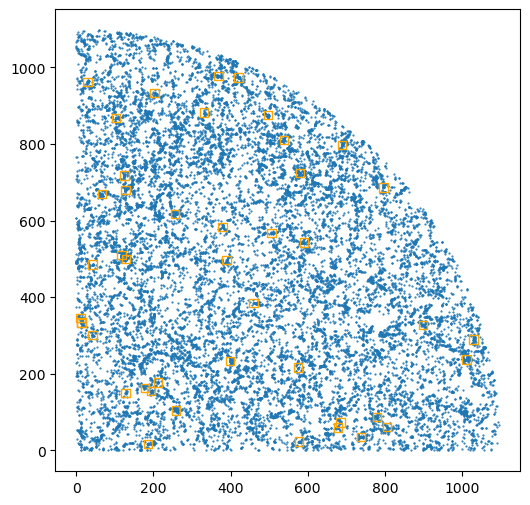

In [128]:
fig, axs = plt.subplots(1,1,figsize = (6,6))
plt.scatter(x_p[(z_p>-1) & (z_p<1)],y_p[(z_p>-1) & (z_p<1)],s = 0.3)
plt.scatter(x_cl_cent[(z_cl_cent>-1) & (z_cl_cent<1)],y_cl_cent[(z_cl_cent>-1) & (z_cl_cent<1)], marker='s', facecolors='none', edgecolors='orange')
#circle = plt.Circle((x_cl_cent[(z_cl_cent>-1) & (z_cl_cent<1)],y_cl_cent[(z_cl_cent>-1) & (z_cl_cent<1)]),100,color = 'red',fill=False, alpha = 0.5)
#axs.add_artist(circle)

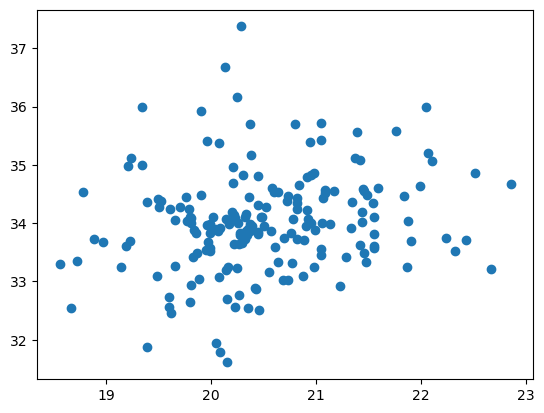

In [130]:
plt.scatter(x_p[np.where(labels == 84035)[0]], y_p[np.where(labels == 84035)[0]])

# expected pieces

9420


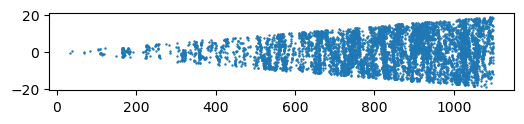

In [10]:
fig, axs = plt.subplots(1,1,figsize = (6,1))
ang_tol_deg = 2
ang_tol = ang_tol_deg*np.pi/180 #2deg
print(len(r_cl[(theta_cl<np.pi/2+ang_tol/2) & (theta_cl>np.pi/2+-ang_tol/2) & (pi_cl<ang_tol/2) & (pi_cl>-ang_tol/2)]))
plt.scatter(xs_cl[(theta_cl<np.pi/2+ang_tol/2) & (theta_cl>np.pi/2-ang_tol/2) & (pi_cl<ang_tol/2) & (pi_cl>-ang_tol/2)],
            ys_cl[(theta_cl<np.pi/2+ang_tol/2) & (theta_cl>np.pi/2-ang_tol/2) & (pi_cl<ang_tol/2) & (pi_cl>-ang_tol/2)],s = 0.5)
#plt.scatter()

In [11]:
pos = return_xyz_formatted_array(xs_cl[(theta_cl<np.pi/2+ang_tol/2) & (theta_cl>np.pi/2-ang_tol/2) & (pi_cl<ang_tol/2) & (pi_cl>-ang_tol/2)]
                               , ys_cl[(theta_cl<np.pi/2+ang_tol/2) & (theta_cl>np.pi/2-ang_tol/2) & (pi_cl<ang_tol/2) & (pi_cl>-ang_tol/2)]
                               , zs_cl[(theta_cl<np.pi/2+ang_tol/2) & (theta_cl>np.pi/2-ang_tol/2) & (pi_cl<ang_tol/2) & (pi_cl>-ang_tol/2)]
                                )
print(len(pos))
t_start = time() 
b_real = 0.2
L_box = 1e4
#b_tool = b_real * ( 4*np.pi/3*dist_cut**3 / L_box**3 )**(1/3) 
b_tool = b_real * ( 4*np.pi/3*dist_cut**3 * (ang_tol_deg**2/41253) / L_box**3 )**(1/3)  #total sky: 41253 square degree
print(b_tool*(L_box**3 / len(pos))**(1/3))
print(b_tool)
groups = FoFGroups(pos, b_tool, b_tool, Lbox = L_box, num_threads='max')
t_end = time()

print("Calculation is done. Time: ",t_end-t_start)

9420
0.7705445375844161
0.0016273515440843223
Calculation is done. Time:  4.228862047195435


In [13]:
Nfof = groups.n_groups
labels= groups.group_ids

cng = []
for i in range(Nfof):
    cng.append(len(labels[np.where(labels == i)[0]]))

cng = np.array(cng)
labels = np.array(labels)

data = [Nfof, cng, labels] 
print(len(cng[cng>5]))
print(len(labels))

113
9420


# cut!

In [35]:
c = 299792.458 #km/s unit

cos = LambdaCDM(H0=72, Om0=0.26, Ode0=0.74)
#r_cl_mpc = r_cl*u.Mpc
#z_c = z_at_value(cos.comoving_distance, r_cl_mpc[:10000], method = 'Bounded').value


In [36]:
np.sin(np.pi/2)

1.0

In [37]:
ang_ran_x = np.random.rand(20)*np.pi
ang_ran_y = np.random.rand(20)*np.pi
ang_ran_z = np.random.rand(20)*np.pi


In [38]:
Rs = []
for i in range(20):
    angle_x = ang_ran_x[i]
    angle_y = ang_ran_y[i]
    angle_z = ang_ran_z[i]
    
    R_x = np.array([[1, 0, 0],
                    [0, np.cos(angle_x), -np.sin(angle_x)],
                    [0, np.sin(angle_x), np.cos(angle_x)]])
    
    R_y = np.array([[np.cos(angle_y), 0, np.sin(angle_y)],
                    [0, 1, 0],
                    [-np.sin(angle_y), 0, np.cos(angle_y)]])
    
    R_z = np.array([[np.cos(angle_z), -np.sin(angle_z), 0],
                    [np.sin(angle_z), np.cos(angle_z), 0],
                    [0, 0, 1]])

    # Combined rotation matrix: R = R_z * R_y * R_x
    R = np.dot(R_z, np.dot(R_y, R_x))
    Rs.append(R)

In [39]:
print(Rs[0])
print(np.dot(Rs[0],[1,0,0]))

[[ 0.80505428 -0.30599879  0.50818535]
 [-0.58835837 -0.30264855  0.7498255 ]
 [-0.07564414 -0.90264533 -0.42368546]]
[ 0.80505428 -0.58835837 -0.07564414]


In [51]:
#360 deg -> 180 pieces in pi direction
#180 deg -> 90 pieces in theta direction
#pieces in the equtor

ang_tol_deg = 2
ang_tol = ang_tol_deg*np.pi/180 #2deg
pi_range = np.linspace(-np.pi+ang_tol,np.pi-ang_tol,170) #undersampling from -pi to pi
b_real = 0.2
L_box = 1e4
b_tool = b_real * ( 4*np.pi/3*dist_cut**3 * (ang_tol_deg**2/41253) / L_box**3 )**(1/3)  #total sky: 41253 square degree

k = 2493

for i in range(1): #20
    print(i)
    x_ran = Rs[i][0][0]*xs_cl + Rs[i][0][1]*ys_cl + Rs[i][0][2]*zs_cl
    y_ran = Rs[i][1][0]*xs_cl + Rs[i][1][1]*ys_cl + Rs[i][1][2]*zs_cl
    z_ran = Rs[i][2][0]*xs_cl + Rs[i][2][1]*ys_cl + Rs[i][2][2]*zs_cl
    
    #r_cl = np.sqrt(xs_cl**2 + ys_cl**2 + zs_cl**2) #The same?
    #v_rv_cl = (xs_cl*vxs_cl + ys_cl*vys_cl + zs_cl*vzs_cl)/r_cl # the same?
    theta_cl_ran = np.arccos(z_ran/r_cl) #zero to pi
    pi_cl_ran = y_ran/np.abs(y_ran)*np.arccos(x_ran/np.sqrt(x_ran**2 + y_ran**2)) #-pi to pi
    
    for j in pi_range[1:2]:
        #print(j)
        masses_piece = masses_cl[(theta_cl_ran<np.pi/2 + ang_tol/2) & (theta_cl_ran>np.pi/2 - ang_tol/2) 
                     & (pi_cl_ran< j + ang_tol/2) & (pi_cl_ran>j-ang_tol/2)]
        r_piece = r_cl[(theta_cl_ran<np.pi/2 + ang_tol/2) & (theta_cl_ran>np.pi/2 - ang_tol/2) 
                     & (pi_cl_ran< j + ang_tol/2) & (pi_cl_ran>j-ang_tol/2)]
        theta_piece = theta_cl_ran[(theta_cl_ran<np.pi/2 + ang_tol/2) & (theta_cl_ran>np.pi/2 - ang_tol/2) 
                     & (pi_cl_ran< j + ang_tol/2) & (pi_cl_ran>j-ang_tol/2)]
        pi_piece = pi_cl_ran[(theta_cl_ran<np.pi/2 + ang_tol/2) & (theta_cl_ran>np.pi/2 - ang_tol/2) 
                     & (pi_cl_ran< j + ang_tol/2) & (pi_cl_ran>j-ang_tol/2)]
        v_rv_piece = v_rv_cl[(theta_cl_ran<np.pi/2 + ang_tol/2) & (theta_cl_ran>np.pi/2 - ang_tol/2) 
                     & (pi_cl_ran< j + ang_tol/2) & (pi_cl_ran>j-ang_tol/2)]
        z_c_piece = z_at_value(cos.comoving_distance, r_piece*u.Mpc/h, method = 'Bounded').value
        z_obs_piece = (1+z_c_piece)*(1+v_rv_piece/c) -1
        
        pos = return_xyz_formatted_array(x_ran[(theta_cl_ran<np.pi/2 + ang_tol/2) & (theta_cl_ran>np.pi/2 - ang_tol/2) 
                     & (pi_cl_ran< j + ang_tol/2) & (pi_cl_ran>j-ang_tol/2)],
                                         y_ran[(theta_cl_ran<np.pi/2 + ang_tol/2) & (theta_cl_ran>np.pi/2 - ang_tol/2) 
                     & (pi_cl_ran< j + ang_tol/2) & (pi_cl_ran>j-ang_tol/2)],
                                         z_ran[(theta_cl_ran<np.pi/2 + ang_tol/2) & (theta_cl_ran>np.pi/2 - ang_tol/2) 
                     & (pi_cl_ran< j + ang_tol/2) & (pi_cl_ran>j-ang_tol/2)])
        
        groups = FoFGroups(pos, b_tool, b_tool, Lbox = L_box, num_threads='max')
        Nfof = groups.n_groups
        labels = groups.group_ids
        #print(len(r_piece))
    
        cng = []
        for i in range(Nfof):
            cng.append(len(labels[np.where(labels == i)[0]]))
            
        data = [list(theta_piece), list(pi_piece), list(z_obs_piece), list(masses_piece), list(r_piece), 
                Nfof, list(labels), cng]
        
#        with open('./output/piece_240516_{}.pkl'.format(k), 'wb') as file:
#        # Use pickle.load() to deserialize and load the list
#            pickle.dump(data, file)

        k += 1
#plt.hist(ang_ran)

0


In [54]:
print(data[-3])
print(len(x_ran))

2
98336132


In [66]:
y_ran[(theta_cl_ran<np.pi/2 + ang_tol/2) & (theta_cl_ran>np.pi/2 - ang_tol/2) 
             & (pi_cl_ran< j + ang_tol/2) & (pi_cl_ran>j-ang_tol/2)]

array([-96.959827  , -94.66095676, -93.94394657, ...,  -6.82007702,
        -3.56965674,  -3.16734048])

In [80]:
pos = return_xyz_formatted_array(x_ran[(theta_cl_ran<np.pi/2 + ang_tol/2) & (theta_cl_ran>np.pi/2 - ang_tol/2) 
             & (pi_cl_ran< j + ang_tol/2) & (pi_cl_ran>j-ang_tol/2)] + L_box/2,
                                 y_ran[(theta_cl_ran<np.pi/2 + ang_tol/2) & (theta_cl_ran>np.pi/2 - ang_tol/2) 
             & (pi_cl_ran< j + ang_tol/2) & (pi_cl_ran>j-ang_tol/2)]+ L_box/2,
                                 z_ran[(theta_cl_ran<np.pi/2 + ang_tol/2) & (theta_cl_ran>np.pi/2 - ang_tol/2) 
             & (pi_cl_ran< j + ang_tol/2) & (pi_cl_ran>j-ang_tol/2)]+ L_box/2)
groups = FoFGroups(pos, b_tool, b_tool, Lbox = L_box, num_threads='max')
Nfof = groups.n_groups
labels = groups.group_ids
cng = []
for i in range(Nfof):
    cng.append(len(labels[np.where(labels == i)[0]]))
cng = np.array(cng)

(array([150.,  19.,   8.,   4.,   5.,   0.,   3.,   2.,   0.,   1.]),
 array([ 6., 15., 24., 33., 42., 51., 60., 69., 78., 87., 96.]),
 <BarContainer object of 10 artists>)

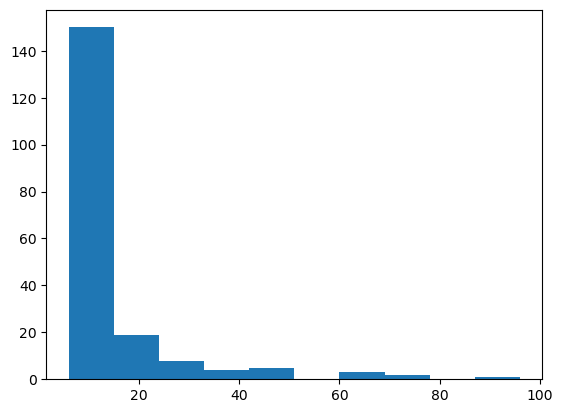

In [82]:
plt.hist(cng[cng>5])

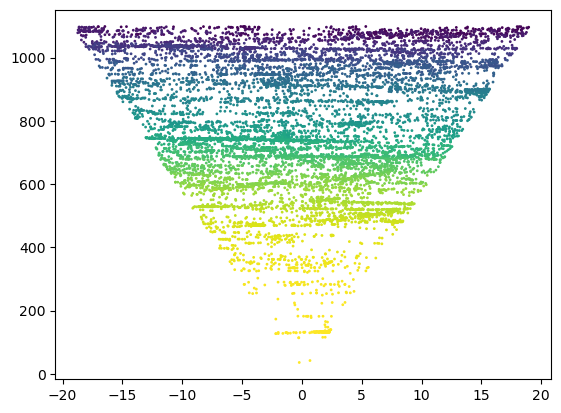

In [84]:
plt.scatter(r_piece*np.cos(theta_piece),r_piece*np.sin(theta_piece), c = labels, cmap = 'viridis',s=1)

(array([9930888., 9769960., 9865088., 9795443., 9772537., 9820140.,
        9815561., 9804559., 9906228., 9855728.]),
 array([-3.14159253e+00, -2.51327402e+00, -1.88495551e+00, -1.25663700e+00,
        -6.28318489e-01,  2.22712786e-08,  6.28318533e-01,  1.25663704e+00,
         1.88495555e+00,  2.51327407e+00,  3.14159258e+00]),
 <BarContainer object of 10 artists>)

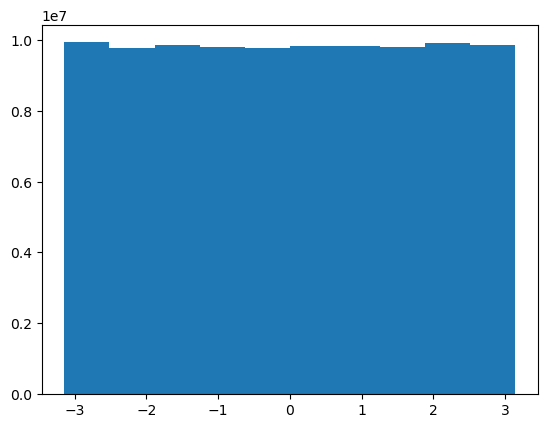

In [21]:
plt.hist(pi_cl_ran)

In [21]:
with open('./output/piece_240516_0.pkl', 'rb') as file:
    # Use pickle.load() to deserialize and load the list
    loaded_list = pickle.load(file)


In [19]:
print(len(loaded_list[0]))

9182


2300
9182


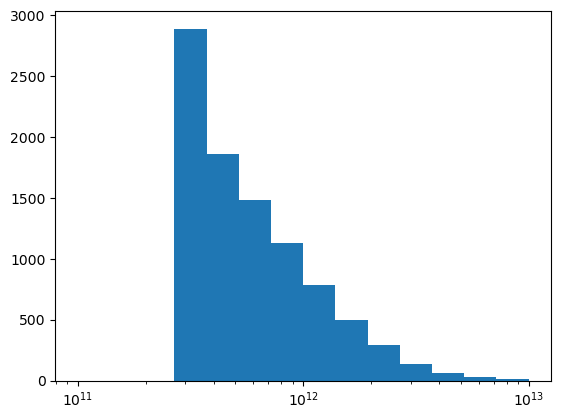

In [26]:
print(len(loaded_list[7]))
print(len(loaded_list[0]))

plt.hist(loaded_list[3],bins = np.logspace(11,13,15))
plt.xscale('log')

(array([  50.,  214.,  170.,  208.,  743., 1148., 1288., 1985., 1154.,
        2222.]),
 array([  99.83424008,  199.71629017,  299.59834026,  399.48039036,
         499.36244045,  599.24449054,  699.12654063,  799.00859072,
         898.89064082,  998.77269091, 1098.654741  ]),
 <BarContainer object of 10 artists>)

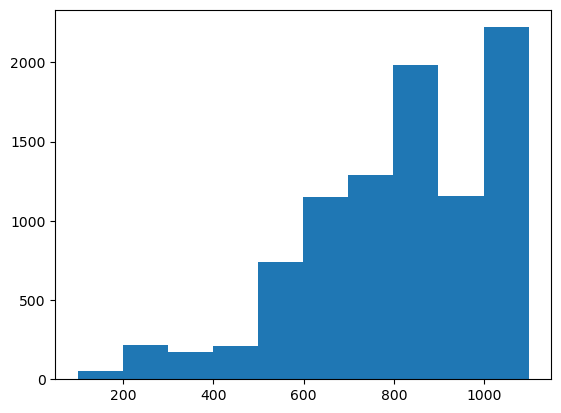

In [34]:
plt.hist(loaded_list[-4])#,bins = np.logspace(11,13,15))
#plt.xscale('log')

# Catalog Check

In [8]:
#~10s
files = glob.glob('./data/*')

Ncl = []
for i in files:
    with open(i, 'rb') as file:
    # Use pickle.load() to deserialize and load the list
        loaded_list = pickle.load(file)
    Ncl.append(loaded_list[-3])

(array([1.852e+03, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 3.700e+01,
        1.850e+02, 3.150e+02, 9.700e+01, 1.000e+01]),
 array([2.0000e+00, 6.1550e+02, 1.2290e+03, 1.8425e+03, 2.4560e+03,
        3.0695e+03, 3.6830e+03, 4.2965e+03, 4.9100e+03, 5.5235e+03,
        6.1370e+03]),
 <BarContainer object of 10 artists>)

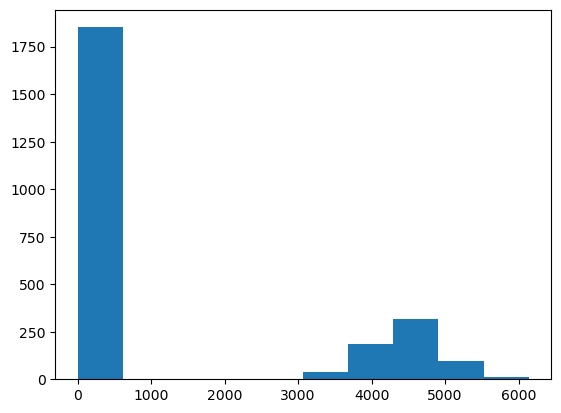

In [11]:
Ncl = np.array(Ncl)
plt.hist(Ncl)

In [30]:
print(len(Ncl[Ncl!=2]))
np.where(Ncl!=2)[0]

650


array([   4,   12,   14,   18,   27,   31,   41,   45,   46,   48,   49,
         56,   57,   64,   66,   67,   68,   69,   70,   72,   73,   74,
         76,   78,   80,   83,   84,   85,   86,   88,   89,   90,   96,
        101,  106,  107,  109,  110,  115,  122,  129,  138,  140,  146,
        151,  165,  167,  169,  183,  186,  188,  192,  194,  199,  202,
        205,  207,  211,  212,  215,  222,  226,  227,  228,  229,  230,
        231,  233,  234,  236,  239,  240,  241,  242,  243,  246,  247,
        248,  255,  256,  262,  263,  265,  268,  271,  274,  275,  279,
        283,  286,  297,  303,  306,  330,  334,  339,  344,  347,  355,
        356,  358,  361,  362,  364,  369,  370,  373,  382,  384,  385,
        386,  387,  388,  390,  392,  393,  395,  396,  397,  398,  399,
        401,  403,  404,  414,  417,  421,  422,  424,  426,  429,  430,
        431,  441,  444,  451,  453,  455,  476,  489,  497,  498,  505,
        510,  515,  517,  518,  522,  527,  528,  5

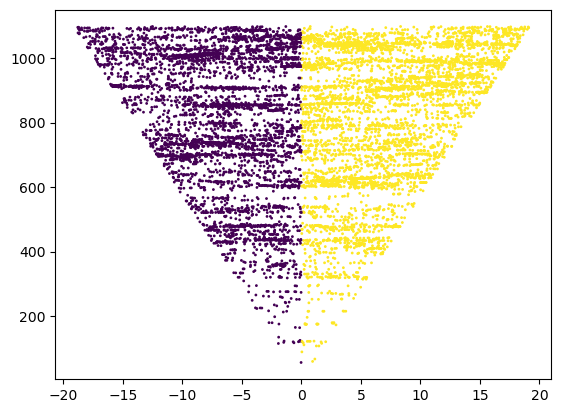

In [34]:
#data = [list(theta_piece), list(pi_piece), list(z_obs_piece), list(masses_piece), list(r_piece), 
#        Nfof, list(labels), cng]

with open(files[15], 'rb') as file:
# Use pickle.load() to deserialize and load the list
    loaded_list = pickle.load(file)
plt.scatter(loaded_list[-4]*np.cos(loaded_list[0]),loaded_list[-4]*np.sin(loaded_list[0]),c = loaded_list[-2], cmap = 'viridis',s= 1)

# FoF again!

In [97]:
for filename in tqdm(files,desc = 'running'):
    with open(filename, 'rb') as file:
    # Use pickle.load() to deserialize and load the list
        loaded_list = pickle.load(file)
    
    theta = loaded_list[0]
    pi = loaded_list[1]
    r = loaded_list[-4]
    #translation for avoiding minus values -> it becomes infty in the pos values.
    pos = return_xyz_formatted_array(r*np.sin(theta)*np.cos(pi) + L_box/2,
                                     r*np.sin(theta)*np.sin(pi) + L_box/2,
                                     r*np.cos(theta) + L_box/2)
    
    groups = FoFGroups(pos, b_tool, b_tool, Lbox = L_box, num_threads='max')
    Nfof = groups.n_groups
    labels = groups.group_ids
    #print(len(r_piece))
    
    cng = []
    for i in range(Nfof):
        cng.append(len(labels[np.where(labels == i)[0]]))
        
    data = [list(theta), list(pi), list(loaded_list[2]), list(loaded_list[3]), list(r), 
            Nfof, list(labels), cng]
    
    with open(filename, 'wb') as file:
        # Use pickle.load() to deserialize and load the list
        pickle.dump(data, file)


running: 100%|████████████████████████████| 2500/2500 [1:15:37<00:00,  1.82s/it]


In [ ]:
for filename in tqdm(files,desc = 'running'):
    with open(filename, 'rb') as file:
    # Use pickle.load() to deserialize and load the list
        loaded_list = pickle.load(file)
    
    theta = loaded_list[0]
    pi = loaded_list[1]
    r = loaded_list[-4]
    #translation for avoiding minus values -> it becomes infty in the pos values.
    pos = return_xyz_formatted_array(r*np.sin(theta)*np.cos(pi) + L_box/2,
                                     r*np.sin(theta)*np.sin(pi) + L_box/2,
                                     r*np.cos(theta) + L_box/2)
    
    groups = FoFGroups(pos, b_tool, b_tool, Lbox = L_box, num_threads='max')
    Nfof = groups.n_groups
    labels = groups.group_ids
    #print(len(r_piece))
    
    cng = []
    for i in range(Nfof):
        cng.append(len(labels[np.where(labels == i)[0]]))
        
    data = [list(theta), list(pi), list(loaded_list[2]), list(loaded_list[3]), list(r), 
            Nfof, list(labels), cng]
    
    with open(filename, 'wb') as file:
        # Use pickle.load() to deserialize and load the list
        pickle.dump(data, file)

In [9]:
# Adding distance
cos = LambdaCDM(H0=72, Om0=0.26, Ode0=0.74)

for filename in tqdm(files,desc = 'running'):
    with open(filename, 'rb') as file:
    # Use pickle.load() to deserialize and load the list
        loaded_list = pickle.load(file)

    z_list = loaded_list[2]
    dist_from_z = [cos.comoving_distance(z).to(u.Mpc).value for z in z_list]
    
    data = [loaded_list[0], loaded_list[1], loaded_list[2], loaded_list[3], loaded_list[4], 
            loaded_list[5], loaded_list[6], loaded_list[7], dist_from_z]
    
    with open(filename, 'wb') as file:
        # Use pickle.load() to deserialize and load the list
        pickle.dump(data, file)    

running: 100%|██████████████████████████████| 2500/2500 [08:39<00:00,  4.81it/s]


In [108]:
for filename in tqdm(files[1:2],desc = 'running'):
    with open(filename, 'rb') as file:
    # Use pickle.load() to deserialize and load the list
        loaded_list = pickle.load(file)

running: 100%|████████████████████████████████████| 1/1 [00:00<00:00, 38.60it/s]


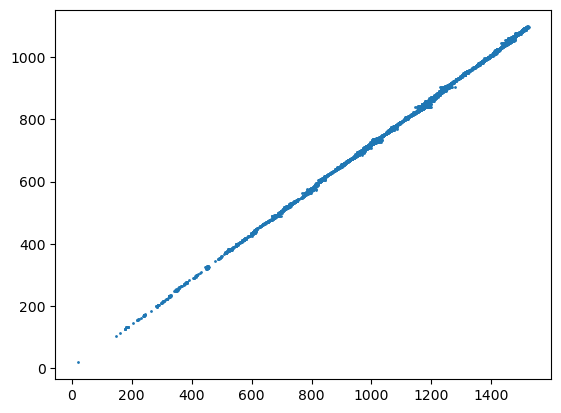

In [110]:
plt.scatter(loaded_list[-1], loaded_list[4],s = 1)

# Adding XYZ from z

In [10]:
files = glob.glob('./data/*')

for filename in tqdm(files,desc = 'running'):
    with open(filename, 'rb') as file:
    # Use pickle.load() to deserialize and load the list
        loaded_list = pickle.load(file)
    
    theta = loaded_list[0]
    theta = theta - np.median(theta) + np.pi/2
    pi = loaded_list[1]
    pi = pi - np.median(pi)
    r = loaded_list[8]
    x_from_z = r*np.sin(theta)*np.cos(pi)
    y_from_z = r*np.sin(theta)*np.sin(pi)
    z_from_z = r*np.cos(theta)

    data = [loaded_list[0], loaded_list[1], loaded_list[2], loaded_list[3], loaded_list[4], 
            loaded_list[5], loaded_list[6], loaded_list[7], loaded_list[8], list(x_from_z), list(y_from_z), list(z_from_z)]
    
    with open(filename, 'wb') as file:
        # Use pickle.load() to deserialize and load the list
        pickle.dump(data, file)    

running: 100%|██████████████████████████████| 2500/2500 [03:24<00:00, 12.22it/s]


# FoF from the observed xyz

In [39]:
for filename in tqdm(files,desc = 'running'):
    with open(filename, 'rb') as file:
    # Use pickle.load() to deserialize and load the list
        loaded_list = pickle.load(file)

    x_from_z = loaded_list[9]
    y_from_z = loaded_list[10]
    z_from_z = loaded_list[11]
    
    pos = return_xyz_formatted_array(np.array(x_from_z) + L_box/2,
                                     np.array(y_from_z) + L_box/2,
                                     np.array(z_from_z) + L_box/2)
    
    groups = FoFGroups(pos, b_tool, b_tool, Lbox = L_box, num_threads='max')
    Nfof = groups.n_groups
    labels = groups.group_ids
    #print(len(r_piece))
    
    cng = []
    for i in range(Nfof):
        cng.append(len(labels[np.where(labels == i)[0]]))
        
    data = [loaded_list[0], loaded_list[1], loaded_list[2], loaded_list[3], loaded_list[4], 
            loaded_list[5], loaded_list[6], loaded_list[7], loaded_list[8], loaded_list[9], loaded_list[10], loaded_list[11],
           Nfof, list(labels), cng]

    with open(filename, 'wb') as file:
        # Use pickle.load() to deserialize and load the list
        pickle.dump(data, file)        

running: 100%|████████████████████████████| 2500/2500 [1:25:15<00:00,  2.05s/it]


In [42]:
files = glob.glob('./data/*')

Ncl = []
Ncl1 = []
for i in files:
    with open(i, 'rb') as file:
    # Use pickle.load() to deserialize and load the list
        loaded_list = pickle.load(file)
    Ncl.append(loaded_list[5])
    Ncl1.append(loaded_list[-3])

Text(0, 0.5, 'Number')

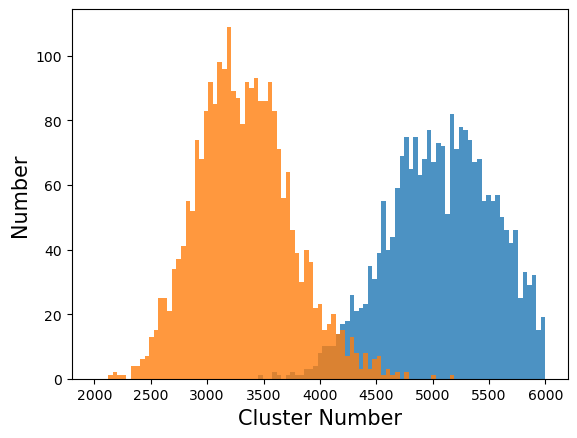

In [46]:
bins=np.linspace(2000, 6000,100)
plt.hist(Ncl, bins = bins,alpha = 0.8)
plt.hist(Ncl1, bins = bins,alpha = 0.8)
plt.xlabel('Cluster Number',fontsize = 15)
plt.ylabel('Number',fontsize = 15)